# Homework 6

Make sure you run the two code blocks below. The first initializes key Python tools. The second imports the dataset which includes personality variables collected from UNG students.

In [2]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

In [13]:
pers = Table.read_table('personality.csv')
pers.show(5)

Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,Sleep,Caff,SitClass,AccDate,Friends,TxRel,Stress1,Stress2,CHS,Thrill,Eat,TypeA,Anx,Opt,SE,Neuro,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
21,2,M,Y,Y,1,N,N,N,3.23,3.5,2,F,N,O,25,15,10,28,23,45,31,30,27,61,29,105,10,142,8,11,41,40,26,27,SE
20,3,F,N,N,2,Y,N,Y,3.95,5.5,1,M,Y,E,15,13,11,29,25,32,32,37,23,60,44,105,3,172,16,11,46,52,26,33,SE
22,3,M,Y,N,2,N,N,N,3.06,8.5,1,B,Y,E,23,8,15,30,27,14,25,24,27,62,17,73,1,134,15,11,48,42,44,29,AG
27,3,F,Y,N,3,N,N,N,2.84,7,1,M,N,E,20,6,13,27,21,33,29,35,26,65,18,90,9,160,16,10,51,51,23,19,SE
24,3,M,Y,N,2,N,N,N,2.39,6,1,F,N,E,25,6,18,24,30,43,31,27,29,65,11,95,5,166,14,10,56,46,27,20,AF


For details about all the variables in the dataset, you may download the following PDF:
     [Personality_Variables](http://faculty.ung.edu/rsinn/personality_variables.pdf)

## A/B Testing

At UNG, are males more narcisstic than females? If we have the correct data, we can answer this question with an $\text{A/B Test}$. We need a numeric variable and a grouping variable. The A/B refers to two different groups. In this dataset, biological sex has two options: male or female. Narcissism is the numeric variable. Our textbook covers A/B testing in Chapter 18. 

In statistics, the same test is called an $\text{independent samples t-test}$.

If you are unfamiliar with the personality trait of narcissism, [Psychology Today](https://www.psychologytoday.com/us/basics/narcissism) has an overview in the first three paragraphs.

### Question 1. Select answer choice 1, 2 or 3.

1. There will be no difference in the levels of narcissism between males and females.
2. Males will exhibit higher levels of narcissism.
3. Females will exhibit higher levels of narcissism.

In the cell below, indicate your answer choice of 1, 2 or 3 follwed by an explanation of your reasoning.

1, 2 or 3 ...

## Tools

Here is a toolkit to help you. We need three programs:

* ab_diff
* ab_shuff
* ab_hist

The first finds differences between the means for groups $A$ and $B$. The second shuffles the grouping variable column. The third shows a picture of the results.

### ab_diff

In [3]:
def ab_diff(tab):
    tab.group(0,np.average)
    a_mean = tab.group(0,np.average).column(1).item(0)
    b_mean = tab.group(0,np.average).column(1).item(1)
    return a_mean - b_mean

*Notes*
- The input for our `ab_diff` function is a table.
- The function finds the difference in A/B group means.
- The function expects the first column to be the grouping variable.
- The function expects the second column to be the numeric variable.
- The output of the function is a number indicating the mean difference between groups A and B.

To demonstrate how it works, let's create a 2-column table called `narc` where narcissism is the numeric variable and biological sex is the grouping variable.

In [4]:
narc = pers.select('Sex','Narc')
narc.show(5)

Sex,Narc
M,11
F,11
M,11
F,10
M,10


Now, let's apply `ab_diff` to our new table.

In [5]:
ab_diff(narc)

-1.7449631449631444

Notice that `ab_diff` proceeds alphabetically and that this takes "female mean" minus "male mean".

## ab_shuffle

Let's create the `ab_shuffle` function. Simply execute the code block below.

In [6]:
def ab_shuffle(tab):
    shuffle_group = tab.sample(with_replacement = False).column(0)
    shuffled_tab = tab.with_column("Shuffled Grouping",shuffle_group).select(2,1)
    return shuffled_tab

*Notes*
- The input for our $\text{ab-shuffle}$ function is a table.
- The function shuffles the first column.
- The function then returns a table with two columns.
- The returned table's first column is the grouping variable.
- The returned table's second column should be the numeric variable.

To illustrate, let's create a table called 'narc' using the 'personality' dataset. Execute the code block below with no changes.

Now, we can apply our `ab_shuffle` function to our new table `narc`.

In [9]:
ab_shuffle(narc).show(5)

Shuffled Grouping,Narc
F,11
M,11
M,11
F,10
M,10


Note that the Grouping variable column is shuffled. Try executing the code block several times, and notice how the shuffling of the first column labels is different each time. The data in the second column is unchanged.

We can use both of our new functions at once to find the difference in means in our shuffled table. Execute the code block below to see that in action.

In [12]:
ab_diff(ab_shuffle(narc))

-0.16019656019656026

Run the code block several times and note how the output changes.

## ab_hist

Let's create our last function, one that will display a visual representation of our results from the A/B test. Execute the code block below.

In [13]:
def ab_hist(myArray, observed_value):
    tab = Table().with_column('A/B Differencs',myArray)
    tab.hist(0)
    _ = plots.plot([observed_value, observed_value], [0, 0.1], color='red', lw=2)

Notes
- The function input requires two things, an array and an observed value.
- We run a "for loop" to generate the array.
- The observed value is the `ab_diff` from the original data in `narc`.

## The `for` loop

First, let's create a variable `observed_diff` which will be the difference in groups A and B in the original `narc` dataset.

### Question 2

In the code block below, define `observed_diff`. Hint, use `ab_diff` to make life easy.

In [16]:
observed_diff = ...

In [17]:
# showing what we expect students to code
# this code block will be deleted in final Homework file
observed_diff = ab_diff(narc)
observed_diff

-1.7449631449631444

Now, we need to create an array of output values. We want to shuffle the grouping variable over and over, and the array will record the results of the mean difference each time. The code block below is our `for` loop. You will need to set the reps variable based on your computer and your internet connection.

In [18]:
narc_diffs = make_array()

# Set reps at 1,000 or less especially if running this in the cloud.
reps = 2500

for i in range(reps):
    new_diff = ab_diff(ab_shuffle(narc))
    narc_diffs = np.append(narc_diffs, new_diff)

To use the above code on another data set, change the variable name `narc_diffs` and change the table from `narc` to the table you wish to read data from. 

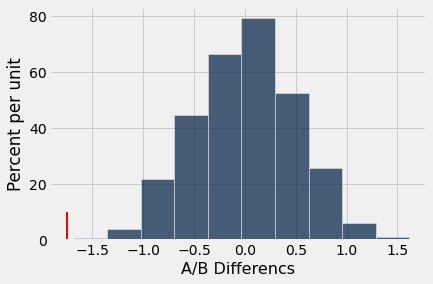

In [19]:
ab_hist(narc_diffs,observed_diff)

View the output above. The red vertical line shows the observed value. The histogram shows the distribution of the shuffled differences.

### Question 3

What is the probability that the red line is a value in the distribution? Estimate the likelihood for a value like this one to appear at random in the distribution shown in the histogram. Write your answer and a brief justification below.

My estimate of the probability is ...

We can calculate the exact probability. Execute the two code blocks below.

In [20]:
sum(narc_diffs <= observed_diff)

0

In [21]:
p_value = sum(narc_diffs <= observed_diff) / reps 
p_value

0.0

We check to see how often the values in the `narc_diffs` distribution are at least as low as the `observed_diff`. The sum function counts how many values meet the criteria. The first code block shows this evaluation. The second code block calculates the p-value. Notice that the probability is $p \approx 0$.

### Question 4

Where do you think the red line would fall in the histogram if the p-value were $p = 0.25$ ? What if $p = 0.8$ or $p = 0.9$ ? Explain your reasoning in the block below.

If the p-value were $p = 0.25$, I believe ...

### Question 5
Given the p-value, what do you think of your guess in Question 1? Is there a difference in the levels of narcissism between males and females? Why do you think so? Are males or females (or neither) more narcissistic?

After seeing the results of A/B testing, I believe that ...

## Practice Problems

Pick at least one of the following practice problems. In the code blocks below, run the indicated independent samples t-test. Calculate an exact p-value, and say what you think the output means in the real world.

1. Using the exact same procedure, test for a difference between male and female `perfectionsim` scores. The following code will help extract the table you need to work with.

```{code}
perf = personality.select('Sex','Perf')
perf.show(5)
```

2. Use an A/B test to determine if older students drink more caffeine than younger students. The `G21` variable has Yes/No responses to the question, "Are you 21 years old or older?" The following code will help get the needed table.

```{code}
caff = personality.select('Sex','Caffeine')
caff.show(5)
```

3. Use an A/B test to determine if older students are less naive about relationships. The variable `TxRel` is based on the "Toxic Relationship Beliefs" scale. The `G21` variable has Yes/No responses to the question, "Are you 21 years old or older?" Higher `TxRel` scores indicate the person is more naive aobut relationships. Determine if younger students are more naive about relationships. The following code will help get the needed table.

```{code}
rel = personality.select('Sex','TxRel')
rel.show(5)
```

4. Use an A/B test to determine if the thrill-seeking behaviors of males and females is different. The numeric variable `Thrill` indicates a person's interesting thrill-seeking behaviors with higher scores indicating more interest. The following code will help get the needed table.

```{code}
thrill = personality.select('Sex','Thrill')
thrill.show(5)
```